# Typhoon 21 century 

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import re
import math
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 13}
matplotlib.rc('font', **font)

import module, setting fronts and figuresize 

In [3]:
Typhoons_data = pd.read_csv("pacific.csv")
Typhoons_data = Typhoons_data.iloc[18062:26136]

Typhoons_data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
18062,EP012000,ALETTA,20000523,0,,TD,14.3N,101.1W,30,1003,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
18063,EP012000,ALETTA,20000523,600,,TS,14.5N,101.8W,35,1002,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
18064,EP012000,ALETTA,20000523,1200,,TS,14.5N,102.5W,40,1001,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
18065,EP012000,ALETTA,20000523,1800,,TS,14.5N,103.1W,45,1000,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
18066,EP012000,ALETTA,20000524,0,,TS,14.6N,103.7W,50,997,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26131,EP222015,SANDRA,20151128,600,,LO,21.2N,109.1W,40,994,...,0,0,0,0,0,0,0,0,0,0
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0


load 21 century data

In [4]:
Typhoons_data = Typhoons_data.replace(-999 , "")

Typhoons_data

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
18062,EP012000,ALETTA,20000523,0,,TD,14.3N,101.1W,30,1003,...,,,,,,,,,,
18063,EP012000,ALETTA,20000523,600,,TS,14.5N,101.8W,35,1002,...,,,,,,,,,,
18064,EP012000,ALETTA,20000523,1200,,TS,14.5N,102.5W,40,1001,...,,,,,,,,,,
18065,EP012000,ALETTA,20000523,1800,,TS,14.5N,103.1W,45,1000,...,,,,,,,,,,
18066,EP012000,ALETTA,20000524,0,,TS,14.6N,103.7W,50,997,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26131,EP222015,SANDRA,20151128,600,,LO,21.2N,109.1W,40,994,...,0,0,0,0,0,0,0,0,0,0
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0


replace -999 with 0 

The detecting device that capable of detecting wind derection, minimum pressure and mussure their speed was introuduce to NOAA in 2004,
-999 means no data.

# How many typhoons are generated each years 

output their names

In [5]:
name_list = Typhoons_data['ID'].drop_duplicates(keep='first')
name_list

18062    EP012000
18083    EP022000
18101    EP032000
18128    EP042000
18133    CP012000
           ...   
25978    EP182015
26005    EP192015
26060    EP202015
26079    EP212015
26112    EP222015
Name: ID, Length: 301, dtype: object

conuting function 

In [6]:
year_index_list= ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

def yearcounting(date_list):
    count_2000=0
    count_2001=0
    count_2002=0
    count_2003=0
    count_2004=0
    count_2005=0
    count_2006=0
    count_2007=0
    count_2008=0
    count_2009=0
    count_2010=0
    count_2011=0
    count_2012=0
    count_2013=0
    count_2014=0
    count_2015=0

    for v,i in date_list.iteritems():
        if 20000000< i <20010000:
            count_2000 = count_2000+1
        elif 20010000< i <20020000:
            count_2001 = count_2001+1
        elif 20020000< i <20030000:
            count_2002 = count_2002+1
        elif 20030000< i <20040000:
            count_2003 = count_2003+1
        elif 20040000< i <20050000:
            count_2004 = count_2004+1
        elif 20050000< i <20060000:
            count_2005 = count_2005+1
        elif 20060000< i <20070000:
            count_2006 = count_2006+1
        elif 20070000< i <20080000:
            count_2007 = count_2007+1
        elif 20080000< i <20090000:
            count_2008 = count_2008+1
        elif 20090000< i <20100000:
            count_2009 = count_2009+1
        elif 20100000< i <20110000:
            count_2010 = count_2010+1
        elif 20110000< i <20120000:
            count_2011 = count_2011+1
        elif 20120000< i <20130000:
            count_2012 = count_2012+1
        elif 20130000< i <20140000:
            count_2013 = count_2013+1
        elif 20140000< i <20150000:
            count_2014 = count_2014+1
        elif 20150000< i:
            count_2015 = count_2015+1

    year_data = pd.Series([count_2000,
                           count_2001,
                           count_2002,
                           count_2003,
                           count_2004,
                           count_2005,
                           count_2006,
                           count_2007,
                           count_2008,
                           count_2009,
                           count_2010,
                           count_2011,
                           count_2012,
                           count_2013,
                           count_2014,
                           count_2015],index=year_index_list)
    return year_data

abstract the date data and counting them 

In [7]:
date_index = name_list.index.tolist()
date = Typhoons_data['Date'][date_index]

the bar graph function

In [8]:
def bargraph_draw (X,Y,width,color,xlabel,ylabel,title):
    X=X
    Y=Y
    fig = plt.figure()
    plt.bar(X,Y,width,color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()

define and insert data from year_data and drawing graph

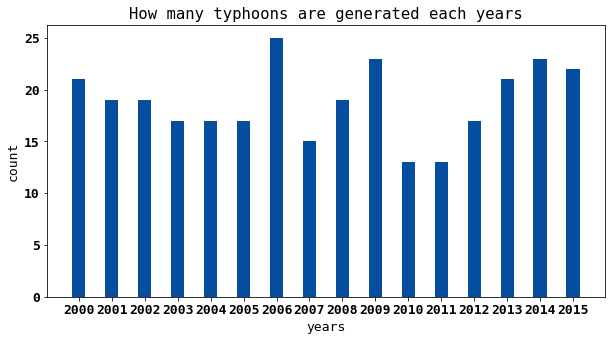

In [9]:
year_data=yearcounting(date)
color = '#054E9F'
bargraph_draw (year_index_list,year_data,0.4,color,'years','count','How many typhoons are generated each years')

##### Interesting point:
why we ues ID to identify rather than using name?          
accoding to NOAA's rule, the code name could be reused after a few years, so sometimes there will be a name clashing.

##### 

# How many Supertyphoons are generated each years

In [10]:
max_wind = Typhoons_data['Maximum Wind']
SuperTY_level= 114#kt

#### abstract Maximum Wind data from Typhoons_data
According to Saffir-Simpson Hurricane Wind Scale(SSHS or SSHWS),
above level 4 could be define as super typhoon(SuperTY)       
Level 4 typhoon standard:          
Maximum Wind:114－135 kt               
Wave hight:13－18 ft，4.0-5.5 m            
Pressure: 27.17-27.88 inHg，920-944 mBar       

In [11]:
max_wind_index = max_wind[max_wind >= SuperTY_level].index.tolist()
#find wind speed above 114 kt
SuperTY_list=Typhoons_data['ID'][max_wind_index]
#find matched Id
SuperTY_list = SuperTY_list.drop_duplicates(keep='first')#
#keep the first data if some typhoon continue blow with a high speed for a along time
SuperTY_date_list = Typhoons_data['Date'][SuperTY_list.index.tolist()]
#match ID list with date

define and insert data from year_data

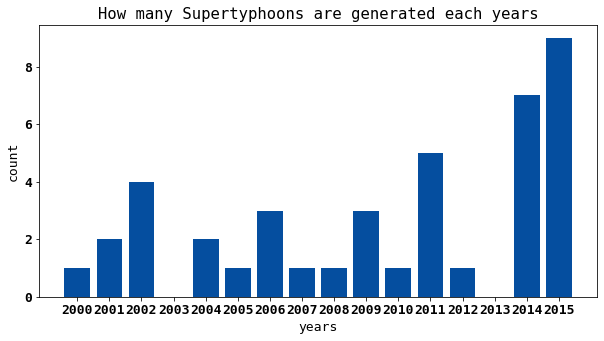

In [12]:
SuperTY_year_data = yearcounting(SuperTY_date_list)
color = '#054E9F'
    
bargraph_draw (year_index_list,SuperTY_year_data,0.8,color,'years','count','How many Supertyphoons are generated each years')


asa

# Typhoon's survival time

identify the start and the ending time for each typhoon

In [13]:
life_index_list1 = Typhoons_data['ID'].drop_duplicates(keep='first').index.tolist()
life_index_list2 = Typhoons_data['ID'].drop_duplicates(keep='last').index.tolist()
#find the start and the end's index
life_date_list1 = Typhoons_data['Date'][life_index_list1].tolist()
life_date_list2 = Typhoons_data['Date'][life_index_list2].tolist()
#transform them to date

caculate the life time for each typhoon and put them into a list

In [14]:
lifetime = []

for i in range(len(life_date_list1)):
    life_time = life_date_list2[i]-life_date_list1[i]
    lifetime.append(life_time)


the function to caculate the mean time for each year 

In [15]:
def meantime(time_list):
    mean_time_year = np.mean(np.array(time_list))
    return mean_time_year

classify them with year

In [16]:
count_2000=[]
count_2001=[]
count_2002=[]
count_2003=[]
count_2004=[]
count_2005=[]
count_2006=[]
count_2007=[]
count_2008=[]
count_2009=[]
count_2010=[]
count_2011=[]
count_2012=[]
count_2013=[]
count_2014=[]
count_2015=[]

for i in life_date_list1:
    if 20000000< i <20010000:
        count_2000.append(lifetime[life_date_list1.index(i)])
    elif 20010000< i <20020000:
        count_2001.append(lifetime[life_date_list1.index(i)])
    elif 20020000< i <20030000:
        count_2002.append(lifetime[life_date_list1.index(i)])
    elif 20030000< i <20040000:
        count_2003.append(lifetime[life_date_list1.index(i)])
    elif 20040000< i <20050000:
        count_2004.append(lifetime[life_date_list1.index(i)])
    elif 20050000< i <20060000:
        count_2005.append(lifetime[life_date_list1.index(i)])
    elif 20060000< i <20070000:
        count_2006.append(lifetime[life_date_list1.index(i)])
    elif 20070000< i <20080000:
        count_2007.append(lifetime[life_date_list1.index(i)])
    elif 20080000< i <20090000:
        count_2008.append(lifetime[life_date_list1.index(i)])
    elif 20090000< i <20100000:
        count_2009.append(lifetime[life_date_list1.index(i)])
    elif 20100000< i <20110000:
        count_2010.append(lifetime[life_date_list1.index(i)])
    elif 20110000< i <20120000:
        count_2011.append(lifetime[life_date_list1.index(i)])
    elif 20120000< i <20130000:
        count_2012.append(lifetime[life_date_list1.index(i)])
    elif 20130000< i <20140000:
        count_2013.append(lifetime[life_date_list1.index(i)])
    elif 20140000< i <20150000:
        count_2014.append(lifetime[life_date_list1.index(i)])
    elif 20150000< i:
        count_2015.append(lifetime[life_date_list1.index(i)])

put them into a list and drawing the graph

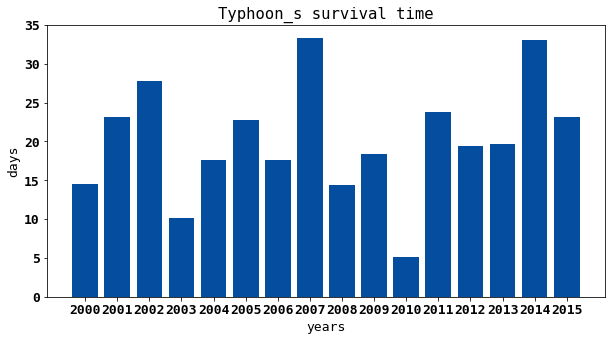

In [17]:
mean_time_year = [meantime(count_2000),meantime(count_2001),meantime(count_2002),
                  meantime(count_2003),meantime(count_2004),meantime(count_2005),
                  meantime(count_2006),meantime(count_2007),meantime(count_2008),
                  meantime(count_2009),meantime(count_2010),meantime(count_2011),
                  meantime(count_2012),meantime(count_2013),meantime(count_2014),
                  meantime(count_2015),]


bargraph_draw (year_index_list,mean_time_year,0.8,color,'years','days','Typhoon_s survival time')
